### Criar modelo preditivo do pipeline de vendas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

In [2]:
#Tirar os alertas
warnings.filterwarnings('ignore')

### Importando a base de dados e verificando se existem dados sujos

In [3]:
df = pd.read_excel('ganhos_perdidos_ml.xlsx')
df.head()

,Nome do negócio,func_0a100,func_101a500,func_501a999,func_1000,plano_0a100,plano_101a499,plano_500,pontuacao_hubspot,fonte_paga,fonte_gratuita,total_contatos,dias_negociacao,emails_abertos,valor,fechamento
0,4 elos distribuidora,1,0,0,0,0,1,0,0,1,0,1,0,0,3671.1,1
1,4leaders.com.br - novo negócio,1,0,0,0,1,0,0,10,0,1,1,0,1,0.0,0
2,a feet,1,0,0,0,1,0,0,0,0,1,0,90,0,745.0,0
3,a.yoshii engenharia,0,0,0,1,1,0,0,320,0,1,1,89,0,1490.0,0
4,acerterh.com.br - novo negócio ( robson),1,0,0,0,1,0,0,20,0,1,1,92,2,0.0,0


In [4]:
#verificar se existem valores nulos
df.isna().sum()

Nome do negócio      0
func_0a100           0
func_101a500         0
func_501a999         0
func_1000            0
plano_0a100          0
plano_101a499        0
plano_500            0
pontuacao_hubspot    0
fonte_paga           0
fonte_gratuita       0
total_contatos       0
dias_negociacao      0
emails_abertos       0
valor                0
fechamento           0
dtype: int64

In [5]:
#Não vamos precisar da coluna de nome para esse modelo
df.drop(columns=['Nome do negócio'], inplace=True)

In [6]:
#confirmando a exclusão da coluna
df.head()

,func_0a100,func_101a500,func_501a999,func_1000,plano_0a100,plano_101a499,plano_500,pontuacao_hubspot,fonte_paga,fonte_gratuita,total_contatos,dias_negociacao,emails_abertos,valor,fechamento
0,1,0,0,0,0,1,0,0,1,0,1,0,0,3671.1,1
1,1,0,0,0,1,0,0,10,0,1,1,0,1,0.0,0
2,1,0,0,0,1,0,0,0,0,1,0,90,0,745.0,0
3,0,0,0,1,1,0,0,320,0,1,1,89,0,1490.0,0
4,1,0,0,0,1,0,0,20,0,1,1,92,2,0.0,0


### Análise de correlação entre as features

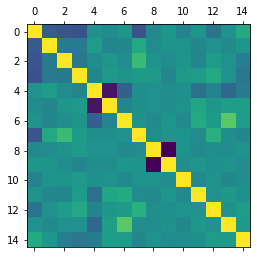

In [7]:
#Verificar correlação
corr_df = df.corr(method='pearson')

plt.matshow(corr_df)
plt.show()

### Separar Features e Label do modelo e fazer o split dos dados usando a técnica de Holdout

In [8]:
X = df.drop(columns=['fechamento'])
y = df['fechamento']

In [9]:
#Vamos ver o número de instancias e features
print(X.shape, y.shape)

(512, 14) (512,)


In [10]:
#Separar os datasets de treino e teste, usando 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(409, 14) (103, 14) (409,) (103,)


In [11]:
#Criando função para medirmos as métricas dos modelos de ML
def print_metrics(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    threshold = 0.00001

    acc = float(tp + tn)/float(tp + fp + tn + fn + threshold)
    prec = float(tp)/float(tp + fp + threshold)
    rec = float(tp)/float(tp + fn + threshold)
    spec = float(tn)/float(tn + fp + threshold)
    
    print("Acc\t\tPrec\t\tRec\t\tSpec\t\tTP\tFN\tFP\tTN")
    print("{:2f}\t{:2f}\t{:2f}\t{:2f}\t{:d}\t{:d}\t{:d}\t{:d}".format(acc*100.0,prec*100.0,rec*100.0,spec*100.0,tp,fn,fp,tn))

### Treinar os modelos

In [12]:
from sklearn.metrics import *

In [13]:
#Resultados usando Regressão Logistica
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print_metrics(y_test, y_pred)

Acc		Prec		Rec		Spec		TP	FN	FP	TN
67.961158	0.000000	0.000000	98.591535	0	32	1	70


In [14]:
#Resultados usando KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print_metrics(y_test, y_pred)

Acc		Prec		Rec		Spec		TP	FN	FP	TN
77.669895	65.517219	59.374981	85.915481	19	13	10	61


In [15]:
#Resultados usando SVM
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print_metrics(y_test, y_pred)

Acc		Prec		Rec		Spec		TP	FN	FP	TN
68.932032	0.000000	0.000000	99.999986	0	32	0	71


In [16]:
#Resultandos usando DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print_metrics(y_test, y_pred)

Acc		Prec		Rec		Spec		TP	FN	FP	TN
80.582516	65.789456	78.124976	81.690129	25	7	13	58


In [17]:
!pip install xgboost

In [18]:
#Resultados usando XGBOOST
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print_metrics(y_test, y_pred)

[10:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Acc		Prec		Rec		Spec		TP	FN	FP	TN
83.495138	72.727251	74.999977	87.323931	24	8	9	62
